In [ ]:
import pandas as pd

In [ ]:
test = pd.read_csv('Final_Test.csv')

In [ ]:
train = pd.read_csv("Final_Train.csv")

In [ ]:
train.head()

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,quarter,rainfall,relative_humidity,average_temperature,NSP Total/ NewMicConf Total,Relapse Total,NSN Total,so2,no2,rspm,Pediatric,Geriatric,15-24,25-34,35-44,45-54,55-64,NEP Total,SumOfHIV_infected
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,1,2.6,21.728250,18.952113,491,109,421,7.803030,23.744767,215.715909,24,26,111,102,101,73,54,275,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,2,150.8,35.571308,30.605233,795,127,551,7.341732,22.504294,184.648809,31,37,218,186,150,98,75,391,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,3,368.9,81.344806,28.749821,649,118,383,7.021000,17.422785,136.511628,30,30,190,132,131,84,52,363,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,4,0.8,54.863122,22.181595,686,126,346,6.832886,27.542857,224.551219,32,36,176,137,147,101,57,291,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,1,8.8,32.535027,20.001286,719,148,364,7.278723,21.356085,189.052632,38,33,165,137,165,101,80,378,0


In [ ]:
final = train.drop([ '15-24' , '25-34' , '35-44' , '45-54' , '55-64'] , axis = 1)

In [ ]:
final['Pediatric'] = train['Pediatric']

In [ ]:
final = final.fillna(method ='bfill') 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled = scaler.fit_transform(final.values)

In [ ]:
scaled_df = pd.DataFrame(scaled , columns = final.columns)

In [ ]:
X = scaled_df.drop('Pediatric' , axis = 1)

In [ ]:
y = scaled_df['Pediatric']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rf = GradientBoostingRegressor()

In [ ]:
rf.fit(X_train , y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [ ]:
#Pediatric

In [ ]:
r2_score(y_test , pred)

0.7694270687742419

In [ ]:
mean_absolute_error(y_test , pred)

0.039011411393228404

In [ ]:
mean_squared_error(y_test , pred)

0.0036791873814437928

In [ ]:
#TRAIN

In [ ]:
Y_TRAIN_PRED = rf.predict(X_train)

In [ ]:
r2_score(y_train , Y_TRAIN_PRED)

0.8756140127837722

In [ ]:
mean_absolute_error(y_train , Y_TRAIN_PRED)

0.0332757561097145

In [ ]:
mean_squared_error(y_train , Y_TRAIN_PRED)

0.0020335197299481294

In [ ]:
#Geriatric

In [ ]:
r2_score(y_test , pred)

0.7834456318618066

In [ ]:
mean_absolute_error(y_test , pred)

0.043594514791952685

In [ ]:
mean_squared_error(y_test , pred)

0.003181737270492241

In [ ]:
#TRAIN

In [ ]:
Y_TRAIN_PRED = rf.predict(X_train)

In [ ]:
r2_score(y_train , Y_TRAIN_PRED)

0.8564115857901571

In [ ]:
mean_absolute_error(y_train , Y_TRAIN_PRED)

0.038170868867534805

In [ ]:
mean_squared_error(y_train , Y_TRAIN_PRED)

0.002314058140403176

In [ ]:
#HIV

In [ ]:
r2_score(y_test , pred)

0.8124143008347255

In [ ]:
mean_absolute_error(y_test , pred)

0.031716755450091484

In [ ]:
mean_squared_error(y_test , pred)

0.0021657857130533385

In [ ]:
#TRAIN

In [ ]:
Y_TRAIN_PRED = rf.predict(X_train)

In [ ]:
r2_score(y_train , Y_TRAIN_PRED)

0.8948611594498073

In [ ]:
mean_absolute_error(y_train , Y_TRAIN_PRED)

0.027410594486343007

In [ ]:
mean_squared_error(y_train , Y_TRAIN_PRED)

0.0015258250046191763

In [ ]:
r2_score(y_test , pred)

0.7697983854816658

In [ ]:
#Pediatric

In [ ]:
final.columns

Index(['AGRA', 'AIZAWL', 'ALAPPUZHA', 'ALLAHABAD', 'ALWAR', 'AMRAVATI',
       'AMRITSAR', 'BATHINDA', 'BHARUCH', 'BHOPAL', 'BULANDSHAHR', 'CACHAR',
       'CHANDIGARH', 'CHENNAI', 'CHITTOOR', 'COIMBATORE', 'CUTTACK',
       'DAKSHINAKANNADA', 'DEHRADUN', 'DHANBAD', 'DIBRUGARH', 'DURG',
       'EASTKHASIHILLS', 'ERNAKULAM', 'FATEHGARHSAHIB', 'FIROZABAD', 'GANJAM',
       'GHAZIABAD', 'GOLAGHAT', 'GUNTUR', 'GWALIOR', 'HASSAN', 'INDORE',
       'JABALPUR', 'JAIPUR', 'JALANDHAR', 'JALGAON', 'JAMNAGAR', 'JHANSI',
       'JODHPUR', 'KANPURNAGAR', 'KOLHAPUR', 'KOLLAM', 'KORBA', 'KOTTAYAM',
       'KOZHIKODE', 'KURNOOL', 'LATUR', 'LUCKNOW', 'LUDHIANA', 'MADURAI',
       'MORADABAD', 'NAGPUR', 'NASHIK', 'NORTHGOA', 'PALAKKAD', 'PATIALA',
       'PUNE', 'RAJKOT', 'RANCHI', 'RAYAGADA', 'SAGAR', 'SALEM', 'SANGLI',
       'SIRMAUR', 'SOLAN', 'SOLAPUR', 'SONBHADRA', 'SONITPUR', 'SOUTHGOA',
       'SURAT', 'THANE', 'THIRUVANANTHAPURAM', 'VADODARA', 'VALSAD',
       'VARANASI', 'VISAKHAPATNAM', 'year

In [ ]:
X_ped = final.drop(['Pediatric','Geriatric', 'NEP Total',
       'SumOfHIV_infected'] , axis = 1)

In [ ]:
X_ped

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,LUCKNOW,LUDHIANA,MADURAI,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,quarter,rainfall,relative_humidity,average_temperature,NSP Total/ NewMicConf Total,Relapse Total,NSN Total,so2,no2,rspm
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,1,2.6,21.728250,18.952113,491,109,421,7.803030,23.744767,215.715909
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,2,150.8,35.571308,30.605233,795,127,551,7.341732,22.504294,184.648809
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,3,368.9,81.344806,28.749821,649,118,383,7.021000,17.422785,136.511628
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,4,0.8,54.863122,22.181595,686,126,346,6.832886,27.542857,224.551219
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,1,8.8,32.535027,20.001286,719,148,364,7.278723,21.356085,189.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017,4,157.9,81.475168,25.634516,773,125,248,8.836826,17.536145,75.570487
3368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,1,1.3,53.566390,25.406647,915,125,286,9.600547,20.254041,72.399197
3369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,2,284.1,68.737323,29.950670,994,141,230,9.746581,20.766438,77.537795
3370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,3,1004.2,88.045541,27.201247,918,105,195,10.048577,20.987388,84.230840


In [ ]:
y_ped = final['Pediatric']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ped, y_ped, test_size=0.33, random_state=42)

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
gb.fit(X_train , y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred = gb.predict(X_test)

In [ ]:
GradientBoostPediatric = pd.DataFrame(y_test.values , columns = ['Test'])

In [ ]:
GradientBoostPediatric['Prediction'] = pred

In [ ]:
GradientBoostPediatric

,Test,Prediction
0,2,3.580218
1,4,4.526271
2,5,5.142628
3,33,25.676346
4,3,5.256143
...,...,...
1108,18,17.283788
1109,5,7.899675
1110,2,3.015467
1111,3,4.358857


In [ ]:
GradientBoostPediatric.to_csv('GradientBoostPediatric.csv' , index = False)

In [ ]:
#Geriatric

In [ ]:
X_ger = final.drop(['Pediatric','Geriatric', 'NEP Total',
       'SumOfHIV_infected'] , axis = 1)

In [ ]:
y_ger = final['Geriatric']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ger, y_ger, test_size=0.33, random_state=42)

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
gb.fit(X_train , y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred_ger = gb.predict(X_test)

In [ ]:
r2_score(y_test , pred_ger)

0.7840366874198712

In [ ]:
GradientBoostGeriatric = pd.DataFrame(y_test.values , columns = ['Test'])

In [ ]:
GradientBoostGeriatric['Prediction'] = pred_ger

In [ ]:
GradientBoostGeriatric

,Test,Prediction
0,14,17.661689
1,2,6.527801
2,38,26.796408
3,53,48.003080
4,22,22.076722
...,...,...
1108,15,22.255269
1109,17,23.813151
1110,13,19.786642
1111,61,54.418758


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

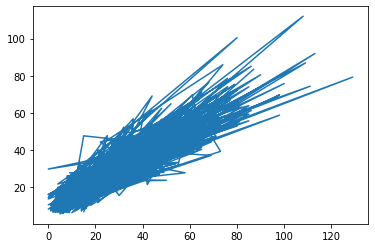

In [ ]:
plt.plot(GradientBoostGeriatric['Test'] , GradientBoostGeriatric['Prediction'])

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


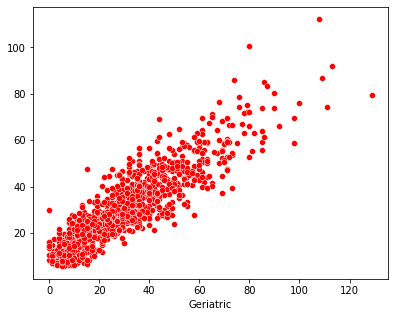

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,pred_ger,ax=ax,color='r')

In [ ]:
GradientBoostGeriatric.to_csv('GradientBoostGeriatric.csv' , index = False)

In [ ]:
#HIV

In [ ]:
y_hiv = final['SumOfHIV_infected']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ger, y_hiv, test_size=0.33, random_state=42)

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
gb.fit(X_train , y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred_hiv = gb.predict(X_test)

In [ ]:
r2_score(y_test , pred_hiv)

0.813590673272357

In [ ]:
GradientBoostHIV = pd.DataFrame(y_test.values , columns = ['Test'])

In [ ]:
GradientBoostHIV['Prediction'] = pred_hiv

In [ ]:
GradientBoostHIV

,Test,Prediction
0,13,23.182872
1,0,-3.243145
2,2,19.369226
3,30,3.292165
4,2,4.877492
...,...,...
1108,4,8.834585
1109,2,5.097695
1110,78,69.297685
1111,70,54.822176


In [ ]:
GradientBoostHIV.to_csv('GradientBoostHIV.csv' , index = False)

In [ ]:
#NEP

In [ ]:
y_nep = final['NEP Total']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ger, y_nep, test_size=0.33, random_state=42)

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
gb.fit(X_train , y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred_nep = gb.predict(X_test)

In [ ]:
r2_score(y_test , pred_nep)

0.8340381153148889

In [ ]:
GradientBoostNEP = pd.DataFrame(y_test.values , columns = ['Test'])

In [ ]:
GradientBoostNEP['Prediction'] = pred_nep

In [ ]:
GradientBoostNEP

,Test,Prediction
0,57,80.010942
1,173,126.647636
2,50,74.799178
3,203,247.640157
4,39,73.231982
...,...,...
1108,46,96.278326
1109,71,101.811696
1110,189,167.907186
1111,95,102.857372


In [ ]:
GradientBoostNEP.to_csv('GradientBoostNEP.csv' , index = False)